In [40]:
# Importing the libraries
from simple_pid import PID
import time
import numpy as np
import sys
sys.path.insert(1, r'C:\Users\benjm\Documents\GitHub\2023-24-fai2-adsai-BenjaminGraziadei223946\3. Reinforcement Learning')
from ot2_env_wrapper import OT2Env


In [41]:
# Importing the environment
env = OT2Env()

# Reseting the environment
observation, info = env.reset()

# Creating the PID controllers for each axis
pid_controller_x = PID(Kp=0.5, Ki=0.01, Kd=0.1)
pid_controller_y = PID(Kp=1, Ki=0.01, Kd=0.1)
pid_controller_z = PID(Kp=0.5, Ki=0.01, Kd=0.1)

# Setting the goal position
env.goal_position = np.array([np.random.uniform(-0.1872, 0.253),
                          np.random.uniform(-0.1705, 0.2195),
                          np.random.uniform(0.1693, 0.2895)], dtype=np.float32)

# Setting the goal position for each axis
pid_controller_x.setpoint = env.goal_position[0]
pid_controller_y.setpoint = env.goal_position[1]
pid_controller_z.setpoint = env.goal_position[2]


In [42]:
epochs = []
observations = []

In [43]:
# Setting termination and truncation false
terminated = False
truncated = False

# Setting the epoch to 0 to start the loop
epoch = 0

for i in range(2000):

    # Breaking the loop if terminated
    if terminated:
        break

    # Incrementing the epoch
    epoch += 1

    # Resetting the environment if truncated

    # Getting the actions for each axis
    action_x = pid_controller_x(observation[0])
    action_y = pid_controller_y(observation[1])
    action_z = pid_controller_z(observation[2])

    # Creating the action array
    action = np.array([action_x, action_y, action_z, 0])

    # Taking a step in the environment
    observation, _, terminated, truncated, _ = env.step(action)

    observations.append(observation)


In [44]:
print(observations[0])

[0.0725     0.0892     0.1205     0.12013179 0.19534703 0.22136037]


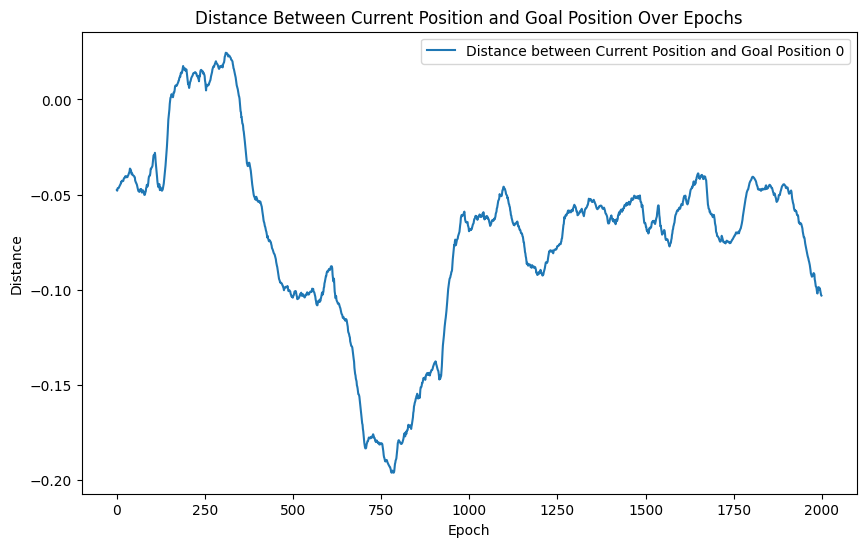

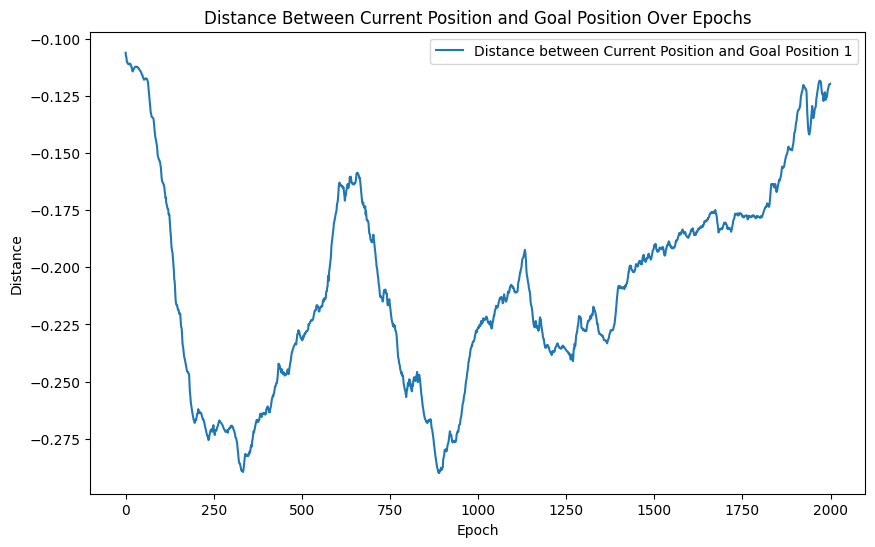

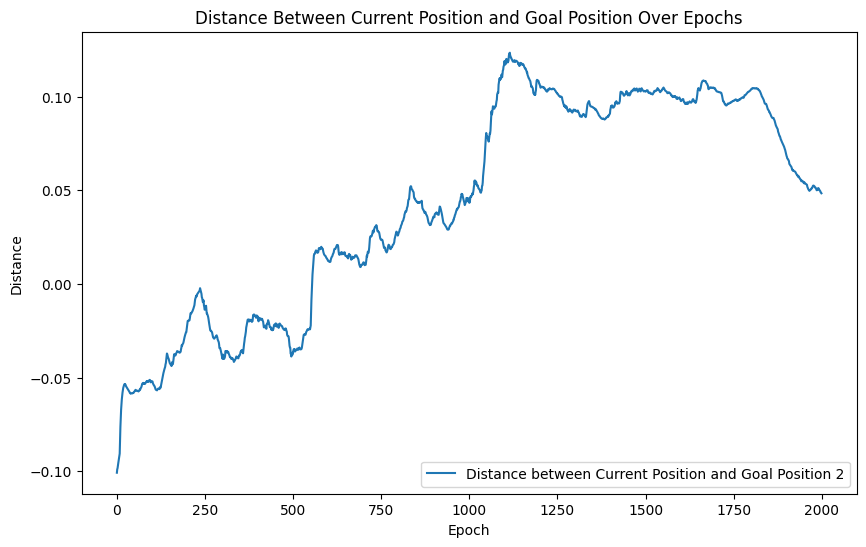

In [45]:
import numpy as np

# Assuming 'observations' is a list where each element is a 6-element list or array
for axis in range(len(observations[1:4])):
    observations_array = np.array(observations)

    # Split the array into current positions (first 3 elements) and goal positions (last 3 elements)
    current_positions = observations_array[:, axis]  # All rows, first 3 columns
    goal_positions = observations_array[:, axis+3]  # All rows, last 3 columns

    # Ensure 'epochs' has the same number of elements as 'observations'
    epochs = range(len(observations_array))  # If you don't have an 'epochs' list, create one

    # Calculate Euclidean distances for each observation
    distances = current_positions - goal_positions

    # Plotting
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, distances, label=f'Distance between Current Position and Goal Position {axis}')
    plt.xlabel('Epoch')
    plt.ylabel('Distance')
    plt.title('Distance Between Current Position and Goal Position Over Epochs')
    plt.legend()
    plt.show()
